# Data: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

# Import data

In [164]:
import pandas as pd 
import seaborn as sns

In [165]:
data = pd.read_csv('weatherAUS - tiny.csv')

In [166]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
9994,04/01/2012,CoffsHarbour,19.6,28.6,0.0,7.4,10.0,NE,56.0,NNW,...,57.0,1015.9,1011.6,1.0,1.0,24.9,26.5,No,0.6,No
9995,05/01/2012,CoffsHarbour,21.3,26.5,0.6,7.6,6.4,NNE,31.0,S,...,70.0,1016.1,1014.2,6.0,7.0,24.6,24.8,No,0.0,No
9996,06/01/2012,CoffsHarbour,18.4,27.6,0.0,5.0,10.6,SSW,56.0,N,...,67.0,1011.5,1012.4,1.0,6.0,25.3,25.9,No,0.0,No
9997,07/01/2012,CoffsHarbour,18.3,26.1,0.0,7.6,9.0,SW,28.0,SW,...,63.0,1015.6,1013.1,3.0,7.0,22.9,24.7,No,0.0,No
9998,08/01/2012,CoffsHarbour,21.4,29.2,0.0,5.8,12.8,NNE,61.0,N,...,64.0,1010.8,1006.6,1.0,4.0,26.0,27.8,No,2.0,Yes


In [167]:
X = data.iloc[:,:-1]

In [168]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2


# Only for this dataset, delete otherwise (Weather AUS)

X.drop('RISK_MM', axis=1, inplace=True)

In [169]:
X.drop('RISK_MM', axis=1, inplace=True)

In [170]:
y = data.iloc[:,-1]

In [171]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

# Handling missing data - Numeric type

In [172]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [173]:
#X.dtypes

In [174]:
numerical_cols = list(np.where((X.dtypes == np.int64) | (X.dtypes == np.float64))[0])

In [175]:
imp_mean.fit(X.iloc[:,numerical_cols])

SimpleImputer()

In [176]:
X.iloc[:,numerical_cols] = imp_mean.transform(X.iloc[:,numerical_cols])

### Handling missing string data

In [177]:
string_cols = list(np.where((X.dtypes == np.object))[0])

In [178]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [179]:
imp_mean.fit(X.iloc[:,string_cols])

SimpleImputer(strategy='most_frequent')

In [180]:
X.iloc[:,string_cols] = imp_mean.transform(X.iloc[:,string_cols])

# One Hot encoder method

In [181]:
def OneHotEncoderMethod(indices, data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices )], remainder='passthrough')
    return columnTransformer.fit_transform(data)

# Label encoding method

In [182]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(series)
    #print('Actual labels',le.classes_)
    #print('Encoding values',le.transform(pd.unique(series)))
    return le.transform(series) 

# Label encoding target feature

In [183]:
y = LabelEncoderMethod(y)

# Encoding selection for X

In [184]:
def EncodingSelection(X, threshold=10):
    # Step 01 : Select the string col
    string_cols = list(np.where((X.dtypes == np.object))[0])
    one_hot_encoding_indices = []
    
    # Step 02: The number of categoty is 2 and more than threshold, label encode
    for col in string_cols:
        lenght = len(pd.unique(X[X.columns[col]]))
        if lenght == 2 or lenght > threshold:
            X[X.columns[col]] = LabelEncoderMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
            
    # Step 03: One hot encode otherwise 
    X = OneHotEncoderMethod(one_hot_encoding_indices, X)
    return X

In [185]:
X = EncodingSelection(X)

In [186]:
X.shape

(9999, 25)

# Feature selection

In [187]:
from sklearn.feature_selection import SelectKBest, chi2

In [188]:
kbest = SelectKBest(score_func=chi2, k=10)

In [189]:
from sklearn import preprocessing
MMS = preprocessing.MinMaxScaler()

In [190]:
K_features = 10

In [191]:
x_temp = MMS.fit_transform(X)

In [192]:
x_temp = kbest.fit(x_temp,y)

In [193]:
best_features = np.argsort(x_temp.scores_)[-K_features:]

In [194]:
best_features

array([11, 23, 16,  7,  2, 21,  3, 20, 17, 24], dtype=int64)

In [195]:
features_to_delete = best_features = np.argsort(x_temp.scores_)[:-K_features]

In [196]:
X = np.delete(X, features_to_delete, axis=1)

In [197]:
X.shape

(9999, 10)

In [198]:
del x_temp

# Train test split

In [199]:
import numpy as np
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [201]:
print(X_train.shape)

(7999, 10)


# Feature scaling

### Standardization: (X - mean(X)) / std(X)

### Normalization = (x - min(x)) / (max(x) - min(x))

In [202]:
from sklearn import preprocessing

In [203]:
sc = preprocessing.StandardScaler(with_mean=False)

In [204]:
sc.fit(X_train)

StandardScaler(with_mean=False)

In [205]:
X_train = sc.transform(X_train)

In [206]:
print(X_train.shape)

(7999, 10)


In [207]:
X_test = sc.transform(X_test)

In [208]:
print(X_test.shape)

(2000, 10)


#### The data is ready!!

In [209]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Building KNN model

In [210]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(X_train,y_train)
y_pred = knnClassifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.859

### Optimal threshold value for KNN

In [211]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
predicted_probabilities = knnClassifier.predict_proba(X_test)

In [212]:
predicted_probabilities

array([[1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667]])

In [213]:
fpr, tpr, thresholds = roc_curve(y_test,predicted_probabilities[:,1])

In [214]:
auc(fpr, tpr)

0.7990590734784353

In [215]:
thresholds

array([2.        , 1.        , 0.66666667, 0.33333333, 0.        ])

### For Optimal threshold, we have used Youdens method

https://en.wikipedia.org/wiki/Youden%27s_J_statistic

### Another approch for optimal threshold value selection: Use all the threshold values and check for the accuracy, and choose the threshold with best accuracy

In [216]:
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), 
                              key=lambda i: i[0], reverse=True)[0][1]

In [217]:
optimal_proba_cutoff

0.3333333333333333

In [218]:
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 
                   for i in predicted_probabilities[:, -1]]

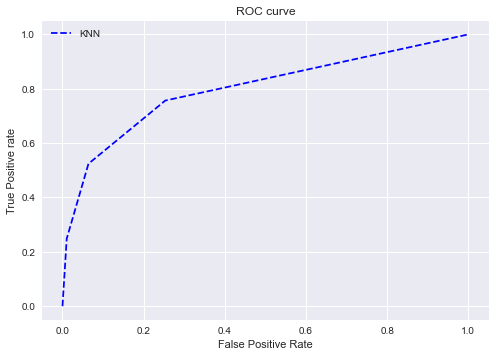

In [219]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='blue', label='KNN')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [220]:
print(classification_report(roc_predictions, y_test))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1305
           1       0.76      0.41      0.53       695

    accuracy                           0.75      2000
   macro avg       0.75      0.67      0.68      2000
weighted avg       0.75      0.75      0.72      2000



In [221]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1700
           1       0.52      0.65      0.58       300

    accuracy                           0.86      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.87      0.86      0.87      2000



# Building Logistic regression model

In [222]:
from sklearn.linear_model import LogisticRegression
LRM = LogisticRegression(random_state=0,max_iter=500)
LRM.fit(X_train,y_train)
y_pred = LRM.predict(X_test)
accuracy_score(y_pred,y_test)


0.872

### Optimal threshold value for Logistic regression

In [223]:
#from sklearn.metrics import roc_curve, auc
predicted_probabilities = LRM.predict_proba(X_test)

In [224]:
predicted_probabilities

array([[0.98390812, 0.01609188],
       [0.55107343, 0.44892657],
       [0.97944452, 0.02055548],
       ...,
       [0.88761113, 0.11238887],
       [0.98289634, 0.01710366],
       [0.52026167, 0.47973833]])

In [225]:
fpr, tpr, thresholds = roc_curve(y_test,predicted_probabilities[:,1])

In [226]:
auc(fpr, tpr)

0.8841075175457638

In [258]:
thresholds.shape

(367,)

In [259]:
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), 
                              key=lambda i: i[0], reverse=True)[0][1]

In [229]:
optimal_proba_cutoff

0.132261873292702

In [230]:
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_probabilities[:, -1]]

In [231]:
print(classification_report(roc_predictions, y_test))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1257
           1       0.86      0.43      0.58       743

    accuracy                           0.76      2000
   macro avg       0.80      0.70      0.71      2000
weighted avg       0.79      0.76      0.74      2000



In [232]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1740
           1       0.51      0.73      0.60       260

    accuracy                           0.87      2000
   macro avg       0.73      0.81      0.76      2000
weighted avg       0.90      0.87      0.88      2000



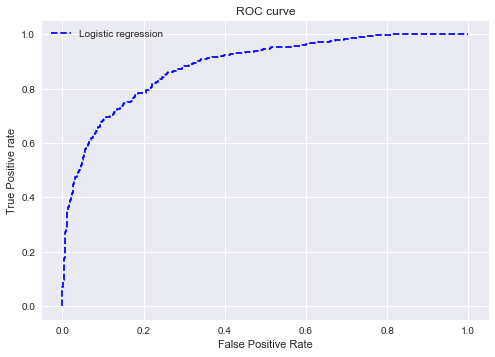

In [233]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='blue', label='Logistic regression')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

# Building GaussianNB model

In [234]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train,y_train)
y_pred = model_GNB.predict(X_test)
accuracy_score(y_pred,y_test)

0.831

### Optimal threshold value for Logistic regression

In [235]:
predicted_probabilities = LRM.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,predicted_probabilities[:,1])
print('AUC :', auc(fpr, tpr))
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), 
                              key=lambda i: i[0], reverse=True)[0][1]
print('Optimal Cutoff', optimal_proba_cutoff)
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_probabilities[:, -1]]

AUC : 0.8841075175457638
Optimal Cutoff 0.132261873292702


In [236]:
print(classification_report(roc_predictions, y_test))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1257
           1       0.86      0.43      0.58       743

    accuracy                           0.76      2000
   macro avg       0.80      0.70      0.71      2000
weighted avg       0.79      0.76      0.74      2000



In [237]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1612
           1       0.57      0.55      0.56       388

    accuracy                           0.83      2000
   macro avg       0.73      0.72      0.73      2000
weighted avg       0.83      0.83      0.83      2000



# Building SVM (SVC) model

In [238]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train,y_train)
y_pred = model_SVC.predict(X_test)
accuracy_score(y_pred,y_test)

0.8765

### Optimal threshold value for SVC

In [239]:
model_SVC = SVC(probability=True)
model_SVC.fit(X_train,y_train)

predicted_probabilities = model_SVC.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,predicted_probabilities[:,1])
print('AUC :', auc(fpr, tpr))
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), 
                              key=lambda i: i[0], reverse=True)[0][1]
print('Optimal Cutoff', optimal_proba_cutoff)
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_probabilities[:, -1]]

AUC : 0.8541974991942433
Optimal Cutoff 0.1436092250109758


In [240]:
print(classification_report(roc_predictions, y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1527
           1       0.73      0.58      0.65       473

    accuracy                           0.85      2000
   macro avg       0.81      0.76      0.78      2000
weighted avg       0.84      0.85      0.84      2000



In [241]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1775
           1       0.47      0.78      0.59       225

    accuracy                           0.88      2000
   macro avg       0.72      0.84      0.76      2000
weighted avg       0.91      0.88      0.89      2000



# Building Decision tree model

In [242]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)
y_pred = model_DTC.predict(X_test)
accuracy_score(y_pred,y_test)

0.8235

### Optimal threshold value for Decision tree model

In [243]:
predicted_probabilities = model_DTC.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,predicted_probabilities[:,1])
print('AUC :', auc(fpr, tpr))
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), 
                              key=lambda i: i[0], reverse=True)[0][1]
print('Optimal Cutoff', optimal_proba_cutoff)
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_probabilities[:, -1]]

AUC : 0.7164542099966454
Optimal Cutoff 1.0


In [244]:
print(classification_report(roc_predictions, y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1613
           1       0.55      0.53      0.54       387

    accuracy                           0.82      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.82      0.82      0.82      2000



In [245]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1613
           1       0.55      0.53      0.54       387

    accuracy                           0.82      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.82      0.82      0.82      2000



# Building Random Forest model

In [246]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators = 500, max_depth= 5)
model_RFC.fit(X_train,y_train)
y_pred = model_RFC.predict(X_test)
accuracy_score(y_pred,y_test)

0.8725

### Optimal threshold value for random forest tree model

In [247]:
predicted_probabilities = model_RFC.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,predicted_probabilities[:,1])
print('AUC :', auc(fpr, tpr))
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), 
                              key=lambda i: i[0], reverse=True)[0][1]
print('Optimal Cutoff', optimal_proba_cutoff)
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_probabilities[:, -1]]

AUC : 0.8761954798692373
Optimal Cutoff 0.22113522686979872


In [248]:
print(classification_report(roc_predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1489
           1       0.73      0.53      0.61       511

    accuracy                           0.83      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.82      0.83      0.82      2000



In [249]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92      1769
           1       0.47      0.76      0.58       231

    accuracy                           0.87      2000
   macro avg       0.72      0.82      0.75      2000
weighted avg       0.91      0.87      0.88      2000



# Building ADABoost model

In [250]:
from sklearn.ensemble import AdaBoostClassifier
model_ABC = AdaBoostClassifier()
model_ABC.fit(X_train,y_train)
y_pred = model_ABC.predict(X_test)
accuracy_score(y_pred,y_test)

0.8725

### Optimal threshold value for ADA boost

In [251]:
predicted_probabilities = model_ABC.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,predicted_probabilities[:,1])
print('AUC :', auc(fpr, tpr))
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), 
                              key=lambda i: i[0], reverse=True)[0][1]
print('Optimal Cutoff', optimal_proba_cutoff)
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_probabilities[:, -1]]

AUC : 0.8815512954594787
Optimal Cutoff 0.49103431559558486


In [252]:
print(classification_report(roc_predictions, y_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1310
           1       0.84      0.46      0.59       690

    accuracy                           0.78      2000
   macro avg       0.81      0.71      0.72      2000
weighted avg       0.79      0.78      0.76      2000



In [253]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1747
           1       0.50      0.74      0.59       253

    accuracy                           0.87      2000
   macro avg       0.73      0.81      0.76      2000
weighted avg       0.90      0.87      0.88      2000



# Building XGBoost model

In [254]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
accuracy_score(y_pred,y_test)

[02:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\chaan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8715

### Optimal threshold value for XGBoost

In [255]:
predicted_probabilities = model_xgb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,predicted_probabilities[:,1])
print('AUC :', auc(fpr, tpr))
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), 
                              key=lambda i: i[0], reverse=True)[0][1]
print('Optimal Cutoff', optimal_proba_cutoff)
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_probabilities[:, -1]]

AUC : 0.8790246725996672
Optimal Cutoff 0.18643494


In [256]:
print(classification_report(roc_predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1465
           1       0.76      0.53      0.62       535

    accuracy                           0.83      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.82      0.83      0.82      2000



In [257]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1721
           1       0.53      0.71      0.61       279

    accuracy                           0.87      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.89      0.87      0.88      2000

